# Лабораторная 3. Линейная регрессия

- Выбор датасетов:
  - датасет о жилье в Калифорнии - https://www.kaggle.com/datasets/camnugent/california-housing-prices

- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [15]:
import csv
import numpy as np
import pandas as pd
from random import shuffle

with open("california_housing_train.csv") as f:
    data = list(csv.reader(f))

# convert to float
for i in range(1, len(data)):
    data[i] = np.array(list(map(float, data[i])))

df = pd.DataFrame(data[1:6], columns=data[0])
display(df)

headers = data[0]
data = data[1:]
shuffle(data)

data = np.transpose(data) # записать данные по столбцам


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Количество строк:

In [16]:
count = len(data[1])
print(count)

17000


Средние значения:

In [17]:
average = [sum(column)/count for column in data]
pd.DataFrame([average], columns=headers)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353


Максимальные и минимальные значения

In [18]:
minValues = [min(column) for column in data]
maxValues = [max(column) for column in data]
            
pd.DataFrame([minValues, maxValues], columns=headers, index=["min", "max"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0
max,-114.31,41.95,52.0,37937.0,6445.0,35682.0,6082.0,15.0001,500001.0


Среднеквадратические отклонения:

In [19]:
sd = []
for i in range(len(data)):
    column = data[i]
    avg = average[i]
    variance = sum((el - avg)**2 for el in column) / count # Дисперсия
    sd.append(variance**0.5)
    
pd.DataFrame([sd], columns=headers)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2.005107,2.137277,12.586567,2179.882954,421.487054,1147.819198,384.509531,1.9081,115980.35305


Визуализация значений:

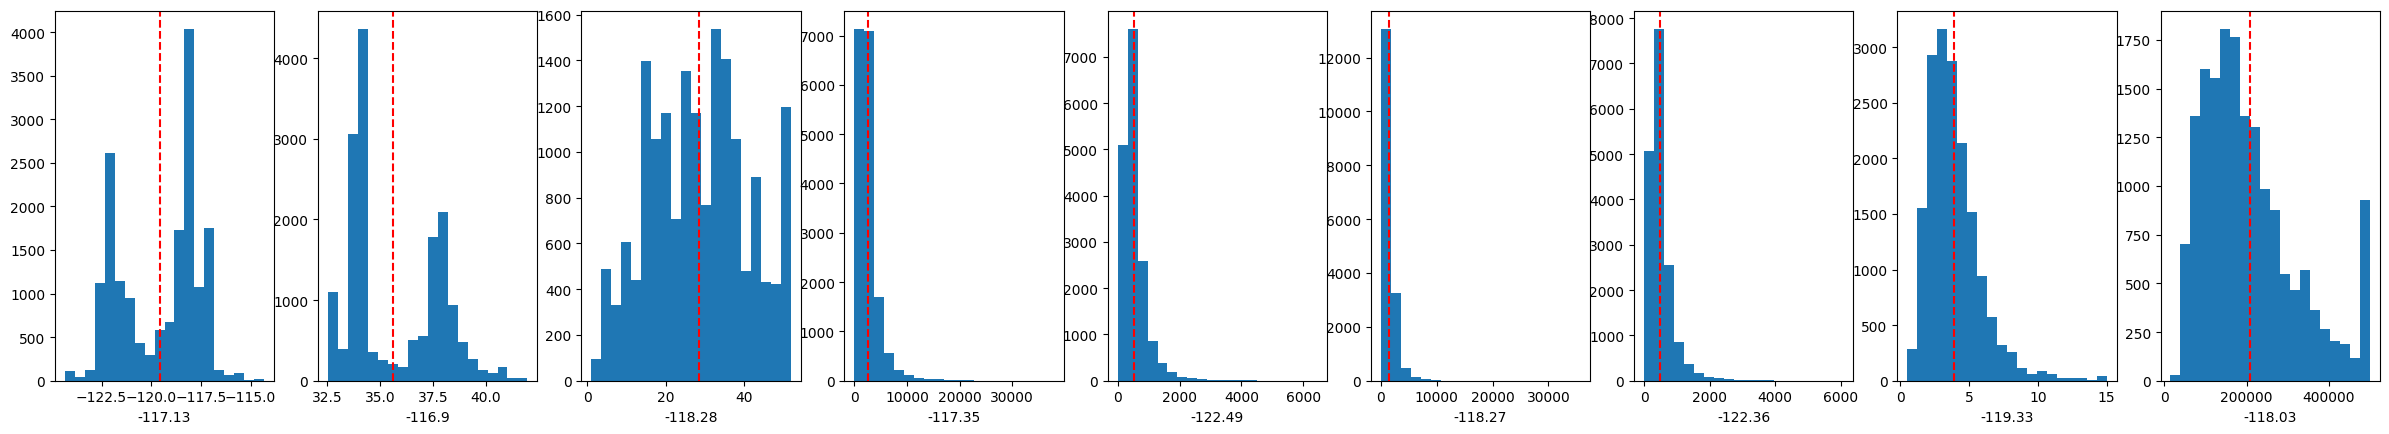

In [20]:
import matplotlib.pyplot as plt

plt.figure().set_figwidth(30)

for i in range(9):
    plt.subplot(1,9,i+1) 
    plt.hist(data[i], bins=20)
    plt.axvline(average[i], color='red', linestyle='dashed')
    plt.xlabel(data[0][i])

plt.show()

In [37]:
quantiles = []
for i in range(9):
    sorted_sample = sorted(data[i])
    q1 = sorted_sample[count//4]
    q2 = sorted_sample[count//2]
    q3 = sorted_sample[count*3//4]
    quantiles.append([q3, q2, q1])

pd.DataFrame(np.transpose(quantiles), columns=headers, index=["Q1", "Q2", "Q3"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Q1,-118.00,37.72,37.0,3152.0,649.0,1721.0,606.0,4.7679,265000.0
Q2,-118.49,34.25,29.0,2127.0,434.0,1167.0,409.0,3.5446,180400.0
Q3,-121.79,33.93,18.0,1462.0,297.0,790.0,282.0,2.5664,119400.0


- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
  - Пропусков данных в файле нет
  - Кодирование категориальных признаков не требуется, так как все данные уже числовые
  - проведем min/max scaling (приведя все значения в диапазон от 0 до 1). Это нужно для того, чтобы разные данные в равной степени влияли на обучение модели

Min/max scaling: 
$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

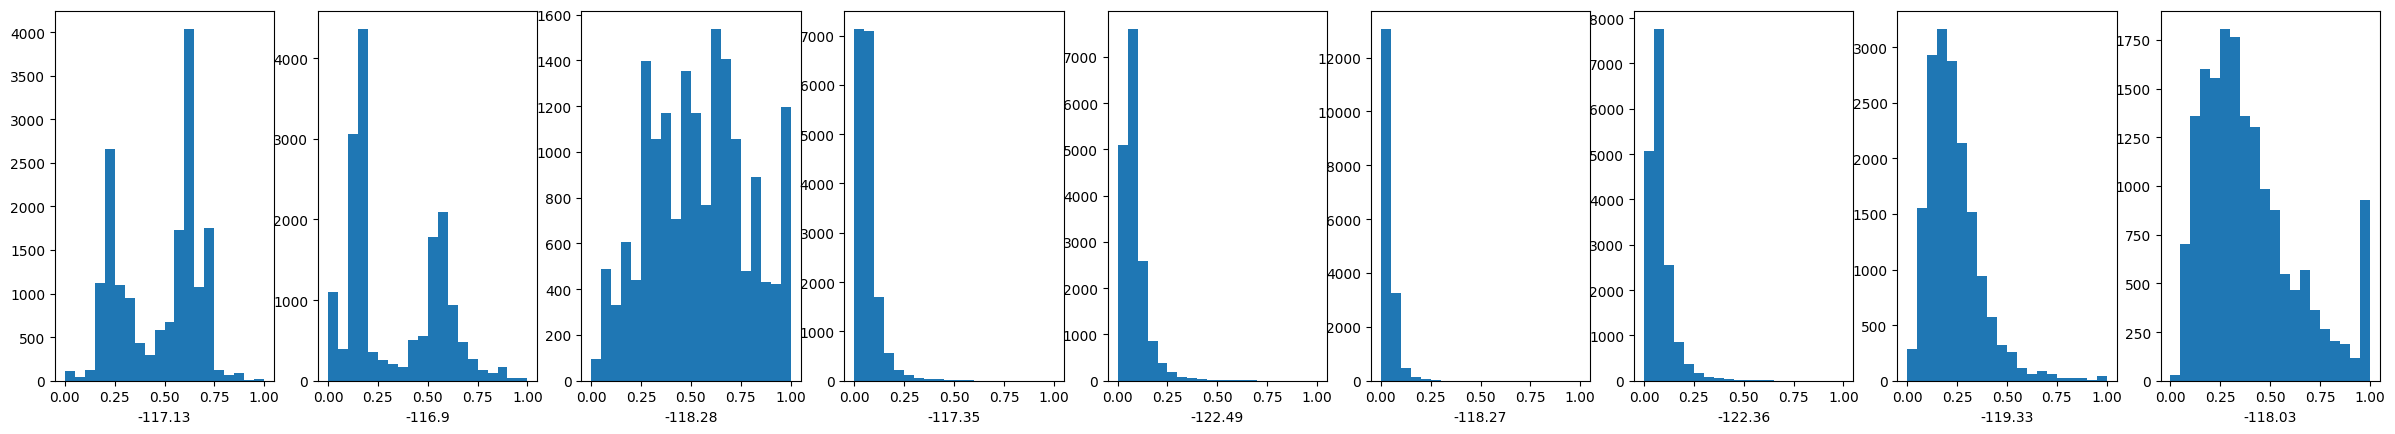

In [22]:
enhancedData = [[99] * count for _ in range(len(data))] 

for i in range(len(data)):
    column = data[i]
    minVal = minValues[i]
    maxVal = maxValues[i]
    for j in range(len(data[i])):
        enhancedData[i][j] = (data[i][j] - minVal) / (maxVal - minVal)

plt.figure().set_figwidth(30)

for i in range(9):
    plt.subplot(1,9,i+1) 
    plt.hist(enhancedData[i], bins=20)
    plt.xlabel(data[0][i])
    
plt.show()

- Разделите данные на обучающий и тестовый наборы данных.
  - разделим в отношении 70 на 30

In [23]:
testData = [column[:int(count*0.3)] for column in enhancedData]
trainData = [column[int(count*0.3):] for column in enhancedData]

- Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas. Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [ ]:
# X - матрица значений независимых переменных (матрица признаков)
# Y - матрица значений зависимой переменной
# return - массив вида [a, b1, b2, ... , bn], где n - число независимых переменных
def getModel(X, Y):
    Y = np.array(Y)
    X = np.array(X)
    X = np.hstack(([[1]]*len(X), X)) # add column of ones
    Xt = X.transpose()
    XtX = np.matmul(Xt, X)
    XtX_inv = np.linalg.inv(XtX)
    B = np.matmul(np.matmul(XtX_inv, Xt), Y)
    return B


данная функция вычисляет коэффициенты модели `[a, b1, b2, ... , bn]` по следующей формуле:
$$ B = (X^TX)^{-1}X^TY $$

- Постройте три модели с различными наборами признаков.

In [25]:
# Индексы столбцов
for i in range(len(headers)):
    print(f"{i} - {headers[i]}")

0 - longitude
1 - latitude
2 - housing_median_age
3 - total_rooms
4 - total_bedrooms
5 - population
6 - households
7 - median_income
8 - median_house_value


Построим модели с такими зависимостями:
1) `median_house_value от (longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income)`
2) `median_house_value от (longitude, latitude, total_bedrooms, population, median_income)`
3) `total_rooms(longitude, latitude, housing_median_age, population)`

In [ ]:
# Model 1
learnDataModel_1 = np.transpose(trainData[0:8]) # берем нужные столбцы
parameters_1 = ['a'] + headers[0:8]

model_1 = getModel(learnDataModel_1, trainData[8])

pd.DataFrame(model_1, index=parameters_1)

,0
a,0.723793
longitude,-0.896348
latitude,-0.833563
housing_median_age,0.128444
total_rooms,-0.666614
total_bedrooms,1.562449
population,-2.679153
households,0.533849
median_income,1.218409


- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным

Коэффициент детерминации:
$$ R^2= 1-\frac{RSS}{TSS} $$
Где:
- RSS - сумма квадратов ошибок (ошибка - разница истинных и предсказанных значений)
- TSS - общая сумма квадратов (отклонений истинных значений от среднего значения)
$$ RSS=\sum_{i=1}^n(\hat{y_i}-y_i)^2 $$
$$ TSS=\sum_{i=1}^n(\bar{y}-y_i)^2 $$
Смысл:
- $R^2=1$ означает, что модель идеально объясняет данные.
- $R^2=0$ означает, что модель не объясняет данные лучше, чем простое среднее значение.
- $0<R^2<1$ - означает, что модель частично объясняет вариативность данных.
- $R^2<0$ - означает, что модель предсказывает хуже, чем простое среднее значение

In [27]:
def predict(model, data):
    value = model[0]
    for i in range(1,len(model)):
        value += model[i] * data[i-1]
    return value


In [28]:
# Model 1
testDataModel_1 = np.transpose(testData[0:8]) # берем нужные столбцы
realValuesModel_1 = testData[8]

rss = 0
tss = 0
avgValue = sum(realValuesModel_1) / len(realValuesModel_1)
for i in range(len(testDataModel_1)):
    value = predict(model_1, testDataModel_1[i])
    rss += (value - realValuesModel_1[i])**2
    tss += (value - avgValue)**2
    
print(f"R^2 = {1-(rss/tss)}")

R^2 = 0.462552525523935


**Model 2**

`median_house_value от (longitude, latitude, total_bedrooms, population, median_income)`


In [ ]:
# Model 2

learnDataModel_2 = np.transpose([trainData[0], trainData[1], trainData[4], trainData[5], trainData[7]]) # берем нужные столбцы
parameters_2 = ['a', headers[0], headers[1], headers[4], headers[5], headers[7]]

model_2 = getModel(learnDataModel_2, trainData[8])

pd.DataFrame(model_2, index=parameters_2)

,0
a,0.973636
longitude,-1.080054
latitude,-0.995045
total_bedrooms,1.418437
population,-2.793356
median_income,1.108942


In [ ]:
# Model 2
testDataModel_2 = np.transpose([testData[0], testData[1], testData[4], testData[5], testData[7]]) # берем нужные столбцы
realValuesModel_2 = testData[8]

rss = 0
tss = 0
avgValue = sum(realValuesModel_2) / len(realValuesModel_2)
for i in range(len(testDataModel_2)):
    value = predict(model_2, testDataModel_2[i])
    rss += (value - realValuesModel_2[i])**2
    tss += (value - avgValue)**2
    
print(f"R^2 = {1-(rss/tss)}")

R^2 = 0.4345885885783779


**Model 3**

`total_rooms(longitude, latitude, housing_median_age, population)`

In [52]:
# Model 3

learnDataModel_3 = np.transpose([trainData[0], trainData[1], trainData[2], trainData[5]]) # берем нужные столбцы
parameters_3 = ['a', headers[0], headers[1], headers[2], headers[5]]

model_3 = getModel(learnDataModel_3, trainData[3])

pd.DataFrame(model_3, index=parameters_3)

,0
a,0.020490
longitude,0.000346
latitude,0.014461
housing_median_age,-0.027285
population,1.476002


In [ ]:
# Model 3

testDataModel_3 = np.transpose([testData[0], testData[1], testData[2], testData[5]]) # берем нужные столбцы
realValuesModel_3 = testData[3]

rss = 0
tss = 0
avgValue = sum(realValuesModel_3) / len(realValuesModel_3)
for i in range(len(testDataModel_3)):
    value = predict(model_3, testDataModel_3[i])
    rss += (value - realValuesModel_3[i])**2
    tss += (value - avgValue)**2
    
print(f"R^2 = {1-(rss/tss)}")

R^2 = 0.7050724965416072
